In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [46]:
df = pd.read_csv(r"C:\Users\John\projects\Personal_Projects\Time_Series\opsd-time_series-2020-10-06\project\time_series_60min_singleindex.csv")
df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [269]:
df0 = df[['utc_timestamp', 'AT_load_actual_entsoe_transparency']].rename(columns={'utc_timestamp':"timestamp", 'AT_load_actual_entsoe_transparency':"load"})
df0.head()

,timestamp,load
0,2014-12-31T23:00:00Z,NaN
1,2015-01-01T00:00:00Z,5946.0
2,2015-01-01T01:00:00Z,5726.0
3,2015-01-01T02:00:00Z,5347.0
4,2015-01-01T03:00:00Z,5249.0


In [270]:
df0.loc[:, "timestamp"] = df0["timestamp"].str.replace("Z", "")
df0.loc[:, "timestamp"] = df0["timestamp"].str.replace("T", " ")
df0.head()

,timestamp,load
0,2014-12-31 23:00:00,NaN
1,2015-01-01 00:00:00,5946.0
2,2015-01-01 01:00:00,5726.0
3,2015-01-01 02:00:00,5347.0
4,2015-01-01 03:00:00,5249.0


In [271]:
df0["timestamp"] = pd.to_datetime(df0["timestamp"])
df0.set_index('timestamp', inplace=True)
df0

,load
timestamp,
2014-12-31 23:00:00,NaN
2015-01-01 00:00:00,5946.0
2015-01-01 01:00:00,5726.0
2015-01-01 02:00:00,5347.0
2015-01-01 03:00:00,5249.0
...,...
2020-09-30 19:00:00,6661.0
2020-09-30 20:00:00,6336.0
2020-09-30 21:00:00,5932.0


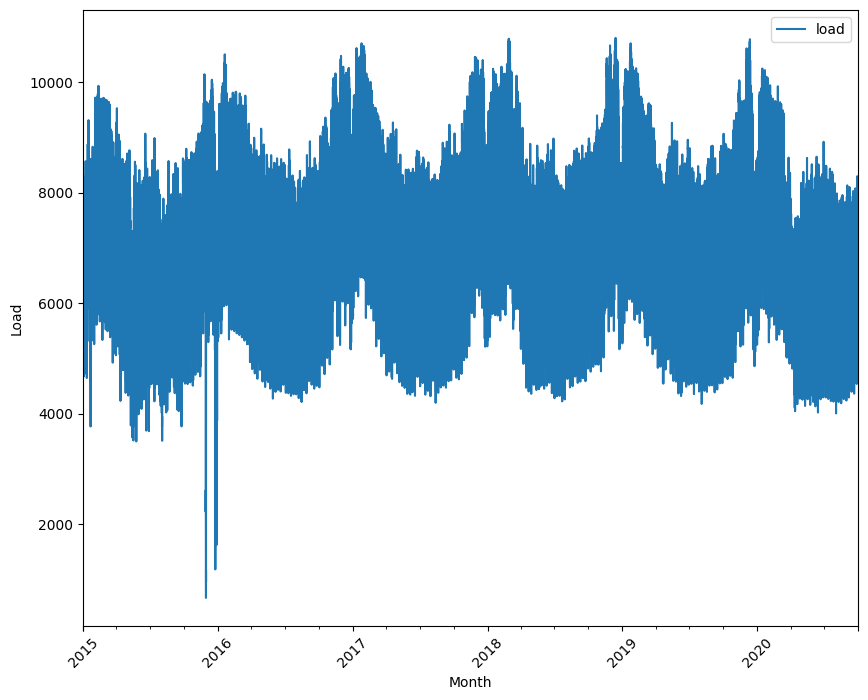

In [272]:
df0.plot(y="load", figsize=(10,8))
plt.xlabel("Month")
plt.ylabel("Load")
plt.xticks(rotation=45)
plt.show()

In [273]:
energy = df0.copy()
energy.tail()

,load
timestamp,
2020-09-30 19:00:00,6661.0
2020-09-30 20:00:00,6336.0
2020-09-30 21:00:00,5932.0
2020-09-30 22:00:00,5628.0
2020-09-30 23:00:00,5395.0


In [274]:
start_train = "2020-08-01"
end_train = "2020-09-28"
start_test = "2020-09-29"

In [283]:
train = energy[start_train:end_train].rename(columns={"load":"load_train"})
test = energy[start_test:].rename(columns={"load":"load_test"})
data = train.join(test, how="outer")

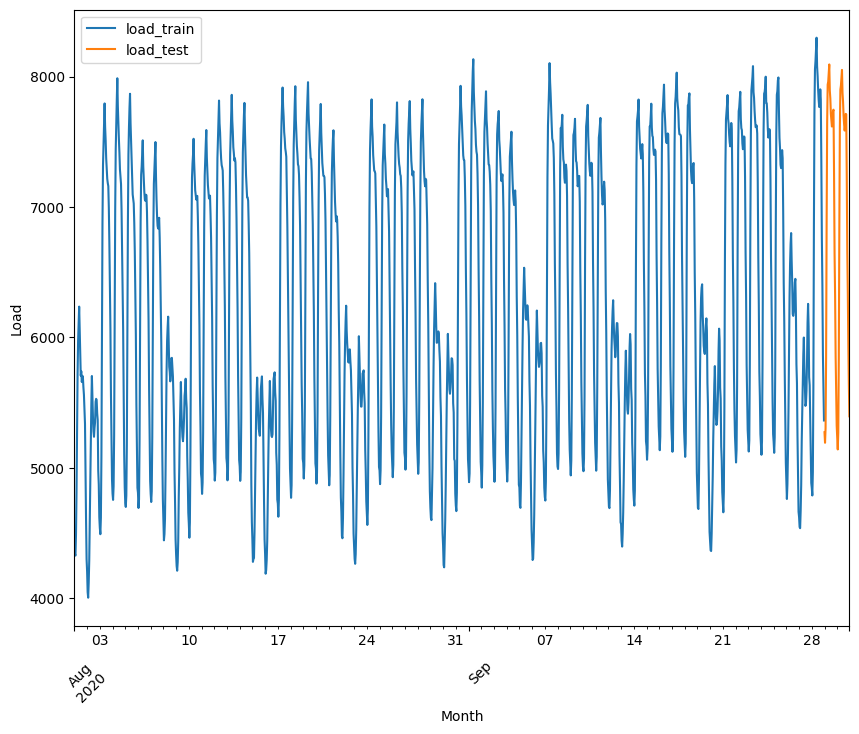

In [284]:
data.plot(y=["load_train", "load_test"], figsize=(10,8))
plt.xlabel("Month")
plt.ylabel("Load")
plt.xticks(rotation=45)
plt.show()

In [285]:
from sklearn.preprocessing import MinMaxScaler
horizon = 3

scale = MinMaxScaler()

train["load_train"] = scale.fit_transform(train)

train

,load_train
timestamp,
2020-08-01 00:00:00,0.119702
2020-08-01 01:00:00,0.078249
2020-08-01 02:00:00,0.075221
2020-08-01 03:00:00,0.112483
2020-08-01 04:00:00,0.187937
...,...
2020-09-28 19:00:00,0.641593
2020-09-28 20:00:00,0.557988
2020-09-28 21:00:00,0.434327


<Axes: ylabel='Frequency'>

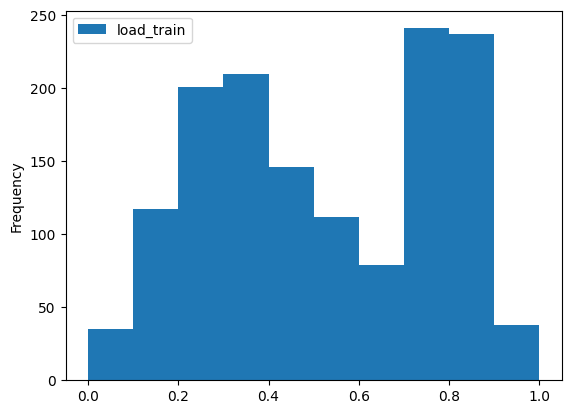

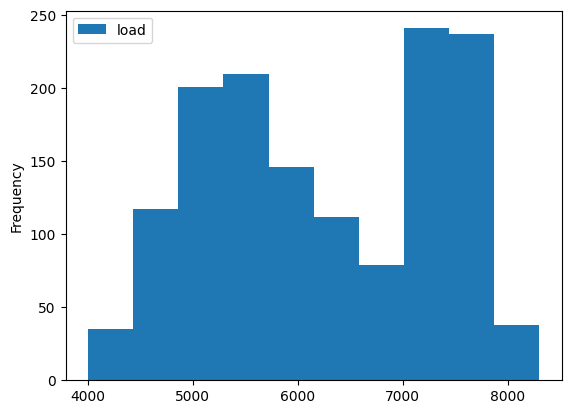

In [286]:
train.plot(kind="hist")
energy[start_train:end_train].plot(kind="hist")

In [287]:
test["load_test"] = scale.fit_transform(test)
test.tail()

,load_test
timestamp,
2020-09-30 19:00:00,0.514905
2020-09-30 20:00:00,0.404810
2020-09-30 21:00:00,0.267954
2020-09-30 22:00:00,0.164973
2020-09-30 23:00:00,0.086043


In [281]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (4,1,0)
seasonal_order = (1,1,0,24)

model = SARIMAX(endog=train, order=order, seasonal_order=seasonal_order)

result = model.fit()
print(result.summary())

c:\Users\John\projects\ML-For-Beginners\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              train   No. Observations:                 1416
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 24)   Log Likelihood                3402.869
Date:                            Sun, 18 May 2025   AIC                          -6793.737
Time:                                    18:01:35   BIC                          -6762.311
Sample:                                08-01-2020   HQIC                         -6781.986
                                     - 09-28-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8745      0.016     54.177      0.000       0.843       0.906
ar.L2         -0.1956      0.030   

In [288]:
test_shift = test.copy()
for t in range(1, horizon):
    test_shift["load_test+" + str(t)] = test_shift["load_test"].shift(-t, freq="h")

test_shift.dropna(how="any", inplace=True)
test_shift.head()

,load_test,load_test+1,load_test+2
timestamp,,,
2020-09-29 00:00:00,0.044715,0.017276,0.054878
2020-09-29 01:00:00,0.017276,0.054878,0.235434
2020-09-29 02:00:00,0.054878,0.235434,0.583672
2020-09-29 03:00:00,0.235434,0.583672,0.848238
2020-09-29 04:00:00,0.583672,0.848238,0.947493


In [317]:
training_period = 720 #Training data on 30 days

train_ns = train["load_train"]
test_ns = test_shift.copy()

history = [x for x in train_ns]
history = history[-training_period:]

prediction = list()


In [318]:
order = (4,1,0)
seasonal_order = (1,1,0,24)

for t in range(test_ns.shape[0]):
    model = SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)
    result = model.fit()
    yforecast = result.forecast(steps=horizon)
    prediction.append(yforecast)

    yvalue = list(test_ns.iloc[t])
    history.append(yvalue[0])
    history.pop(0)
    print(test_ns.index[t])
    print(f"{t+1}: Expected: {yvalue} but Pridicted: {yforecast}")

2020-09-29 00:00:00
1: Expected: [0.04471544715447151, 0.017276422764227473, 0.05487804878048763] but Pridicted: [0.31288065 0.29534179 0.31886865]
2020-09-29 01:00:00
2: Expected: [0.017276422764227473, 0.05487804878048763, 0.2354336043360432] but Pridicted: [-0.22649657 -0.34720335 -0.26139093]
2020-09-29 02:00:00
3: Expected: [0.05487804878048763, 0.2354336043360432, 0.5836720867208671] but Pridicted: [0.09110288 0.27923665 0.52497436]
2020-09-29 03:00:00
4: Expected: [0.2354336043360432, 0.5836720867208671, 0.8482384823848237] but Pridicted: [0.22658652 0.46718116 0.63881352]
2020-09-29 04:00:00
5: Expected: [0.5836720867208671, 0.8482384823848237, 0.9474932249322492] but Pridicted: [0.48055165 0.65436965 0.71622497]
2020-09-29 05:00:00
6: Expected: [0.8482384823848237, 0.9474932249322492, 0.9552845528455285] but Pridicted: [0.83324197 0.93659344 0.96217541]
2020-09-29 06:00:00
7: Expected: [0.9474932249322492, 0.9552845528455285, 0.9789972899728998] but Pridicted: [0.96310315 0.99

In [321]:
eval_df = pd.DataFrame(prediction, columns=['t+'+str(t) for t in range(1, horizon+1)])
eval_df['timestamp'] = test.index[0:len(test.index)-horizon+1]
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.array(np.transpose(test_ns)).ravel()
eval_df[['prediction', 'actual']] = scale.inverse_transform(eval_df[['prediction', 'actual']])
eval_df

,timestamp,h,prediction,actual
0,2020-09-29 00:00:00,t+1,6064.623683,5273.0
1,2020-09-29 01:00:00,t+1,4472.382137,5192.0
2,2020-09-29 02:00:00,t+1,5409.935693,5303.0
3,2020-09-29 03:00:00,t+1,5809.883398,5836.0
4,2020-09-29 04:00:00,t+1,6559.588467,6864.0
...,...,...,...,...
133,2020-09-30 17:00:00,t+3,6751.279673,6661.0
134,2020-09-30 18:00:00,t+3,6444.637172,6336.0
135,2020-09-30 19:00:00,t+3,5926.271728,5932.0
136,2020-09-30 20:00:00,t+3,5671.984006,5628.0


In [322]:
if(horizon > 1):
    eval_df['APE'] = (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
    print(eval_df.groupby('h')['APE'].mean())

h
t+1    0.016289
t+2    0.026678
t+3    0.033228
Name: APE, dtype: float64


In [328]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(eval_df['actual'], eval_df['prediction'])
rmse = np.sqrt(mae)

print(f"rmse: {rmse}")

rmse: 291.84007023982326


C:\Users\John\AppData\Local\Temp\ipykernel_6864\3376294523.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


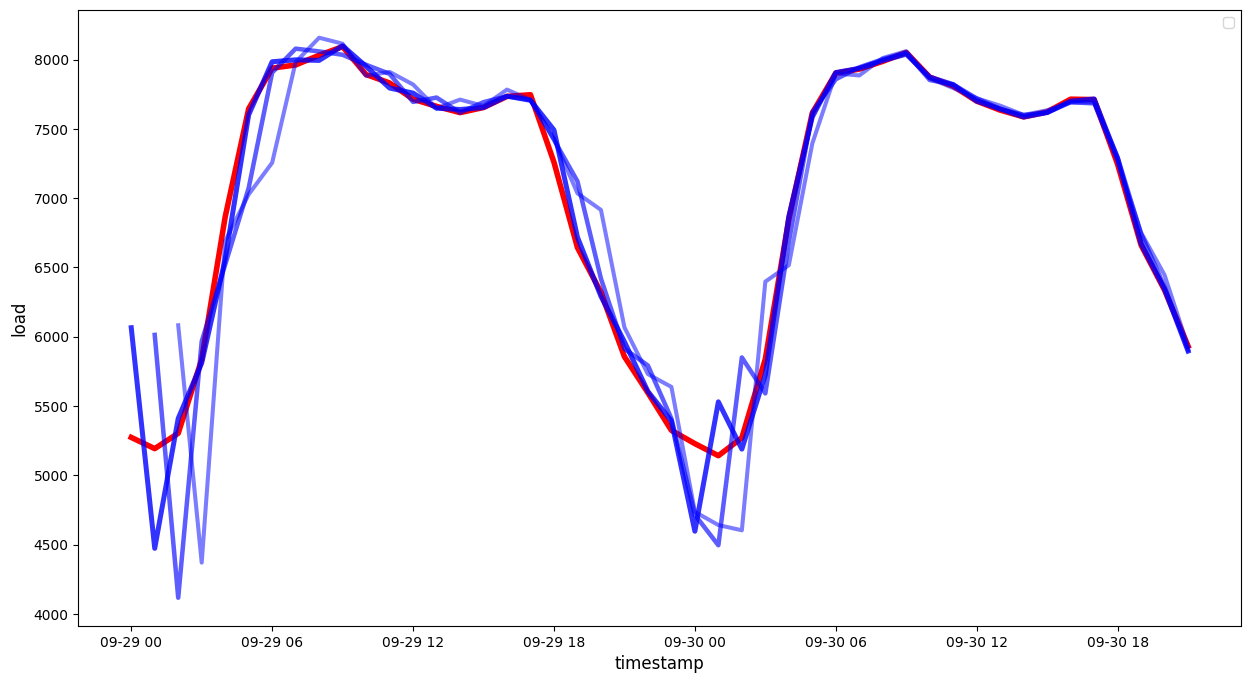

In [324]:
import math


if(horizon == 1):
    ## Plotting single step forecast
    eval_df.plot(x='timestamp', y=['actual', 'prediction'], style=['r', 'b'], figsize=(15, 8))

else:
    ## Plotting multi step forecast
    plot_df = eval_df[(eval_df.h=='t+1')][['timestamp', 'actual']]
    for t in range(1, horizon+1):
        plot_df['t+'+str(t)] = eval_df[(eval_df.h=='t+'+str(t))]['prediction'].values

    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
    ax.plot(plot_df['timestamp'], plot_df['actual'], color='red', linewidth=4.0)
    for t in range(1, horizon+1):
        x = plot_df['timestamp'][(t-1):]
        y = plot_df['t+'+str(t)][0:len(x)]
        ax.plot(x, y, color='blue', linewidth=4*math.pow(.9,t), alpha=math.pow(0.8,t))

    ax.legend(loc='best')

plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()